In [222]:
%reset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [223]:
sns.set_theme()

In [224]:
df = pd.read_csv("data/train.csv")
display(df)

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01 00:00:00,0,1,0.24000,0.28790,0.81000,0.00000,16
1,2011-01-01 01:00:00,0,1,0.22000,0.27270,0.80000,0.00000,40
2,2011-01-01 02:00:00,0,1,0.22000,0.27270,0.80000,0.00000,32
3,2011-01-01 03:00:00,0,1,0.24000,0.28790,0.75000,0.00000,13
4,2011-01-01 04:00:00,0,1,0.24000,0.28790,0.75000,0.00000,1
...,...,...,...,...,...,...,...,...
16632,2012-11-30 19:00:00,0,1,0.32000,0.34850,0.66000,0.00000,377
16633,2012-11-30 20:00:00,0,1,0.32000,0.34850,0.66000,0.00000,245
16634,2012-11-30 21:00:00,0,1,0.30000,0.31820,0.75000,0.08960,183
16635,2012-11-30 22:00:00,0,1,0.30000,0.33330,0.75000,0.00000,163


In [225]:
def plot_count(df):
    fig = plt.figure(figsize=(25, 10))
    count_plot = sns.lineplot(x=df['date_hour'][::24*7], y=df['cnt'][::24*7])
    count_plot.set_xticklabels(labels= range(len(df['date_hour'][::24*7])))
    count_plot.set_xlabel('Week')

C:\Users\Mark\AppData\Local\Temp\ipykernel_12264\766682676.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  count_plot.set_xticklabels(labels= range(len(df['date_hour'][::168])))


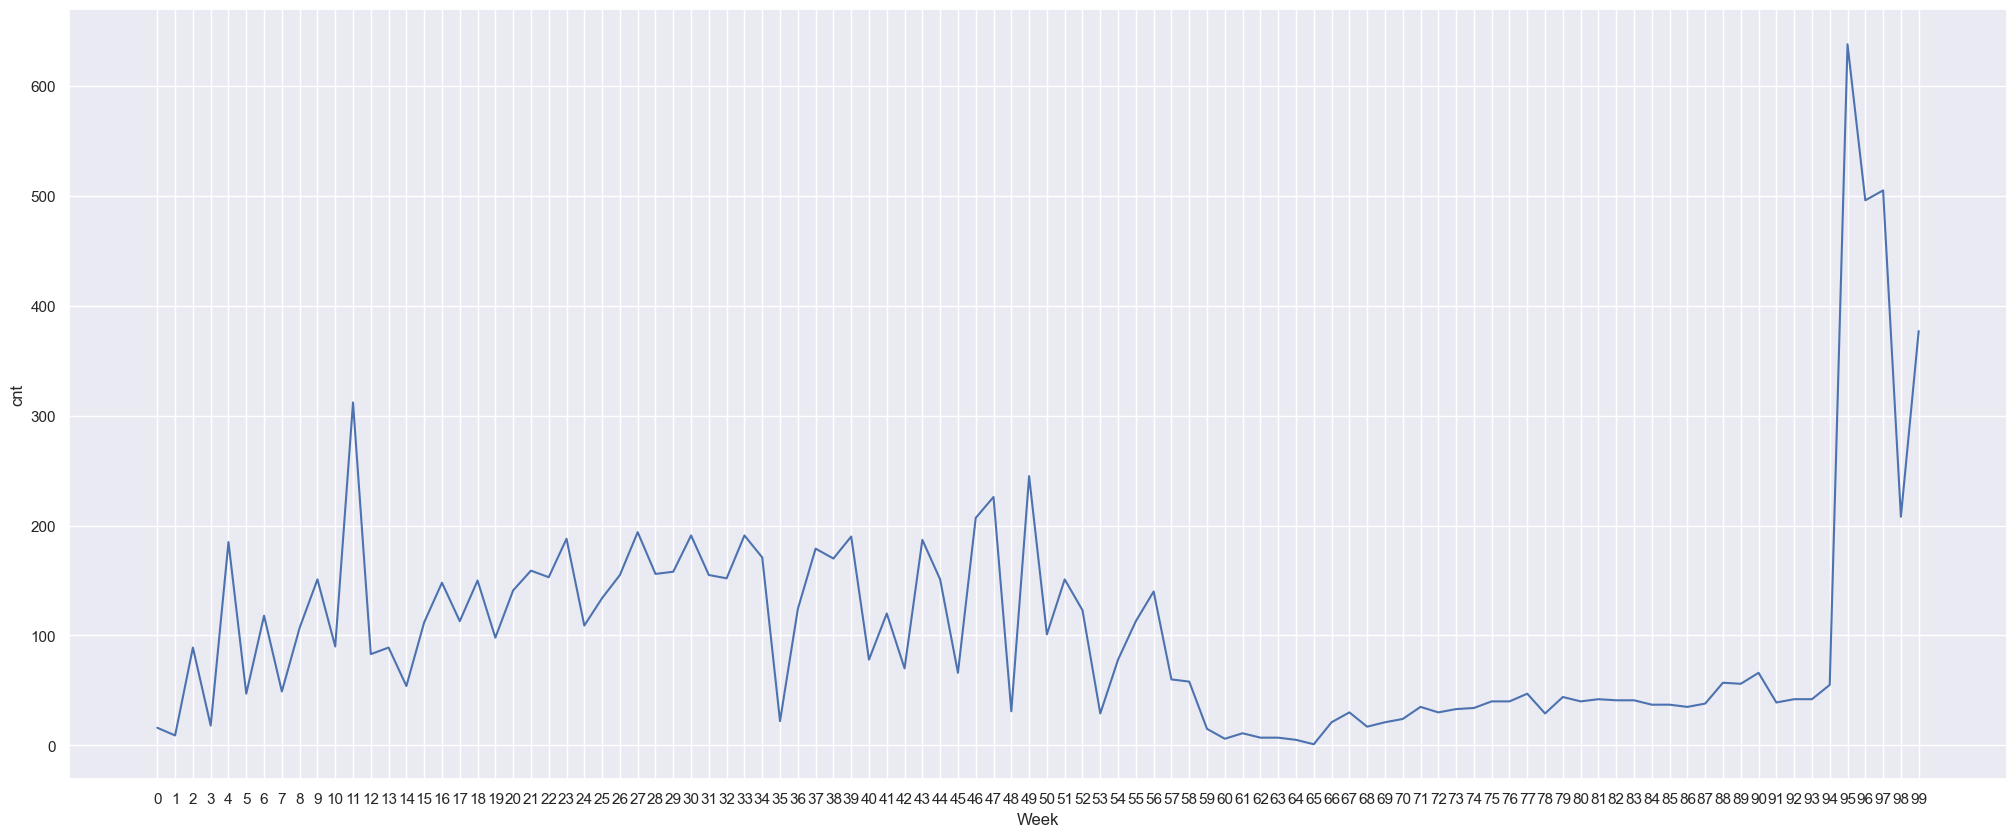

In [226]:
plot_count(df)

In [334]:
def ffr_freq(values, threshold):
    fig = plt.figure(figsize=(10, 4))
    
    freq = np.fft.fftfreq(len(values), 1)
    result = np.abs(np.fft.fft(values))
    
    cleaned_result = np.array([x if x >= threshold*10**5 else 0 for x in result[:int(len(result)/2)]])
    cleaned_freq = freq[:int(len(freq)/2)]
    
    plt.plot(cleaned_freq, cleaned_result)
    plt.xlim([-0.02, 0.52])
    plt.ylim([-1*10**5, 1*10**6])
    plt.axhline(threshold*10**5, color='green', dashes=(5, 5))
    sale_intervals = freq[(result >= threshold*10**5) & (freq > 0)]
    
    fft_df = pd.DataFrame({'amplitude':cleaned_result[cleaned_result > 0][1:]})
    fft_df['freq'] = cleaned_freq[cleaned_result > 0][1:]
    fft_df['duur in uren'] = 1/fft_df['freq']
    fft_df['duur in dagen'] = 1/fft_df['freq']/24
    fft_df['duur in maanden'] = 1/fft_df['freq']/24/30
    fft_df['duur in jaren'] = 1/fft_df['freq']/24/365.25
    
    return freq, result, 1/sale_intervals, fft_df

,amplitude,freq,duur in uren,duur in dagen,duur in maanden,duur in jaren
0,489864.29984,0.00006,16637.00000,693.20833,23.10694,1.89790
1,560236.24103,0.00012,8318.50000,346.60417,11.55347,0.94895
2,217822.74469,0.00018,5545.66667,231.06944,7.70231,0.63263
3,249918.60548,0.00024,4159.25000,173.30208,5.77674,0.47448
4,702799.95302,0.04159,24.04191,1.00175,0.03339,0.00274
5,260337.71673,0.04165,24.00722,1.00030,0.03334,0.00274
6,699280.80860,0.04171,23.97262,0.99886,0.03330,0.00273
7,479527.14426,0.04177,23.93813,0.99742,0.03325,0.00273
8,307463.82699,0.04183,23.90374,0.99599,0.03320,0.00273
9,288985.41455,0.04189,23.86944,0.99456,0.03315,0.00272


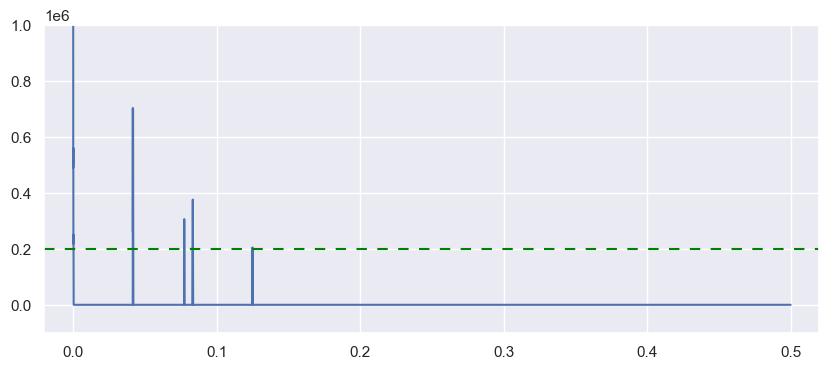

In [335]:
freq, result, sale_intervals, fft_df = ffr_freq(df['cnt'], 2)
display(fft_df)